In [3]:
!pip install pandas-profiling --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.5.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [4]:
!pip install pandas-profiling --quiet


In [5]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [6]:
from urllib.request import urlretrieve

In [7]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1f7b1cf9250>)

In [8]:
import pandas as pd

In [9]:
medical_df=pd.read_csv('medical.csv')

In [10]:
!pip install jovian --quiet

In [11]:
import jovian

<IPython.core.display.Javascript object>

In [12]:
!pip install plotly matplotlib seaborn --quiet

In [13]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [15]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

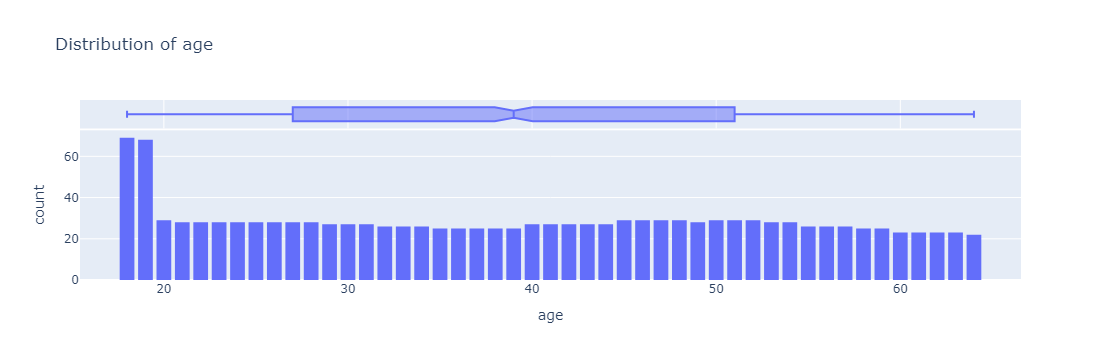

In [16]:
fig = px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of age')
fig.update_layout(bargap=0.2)
fig.show()

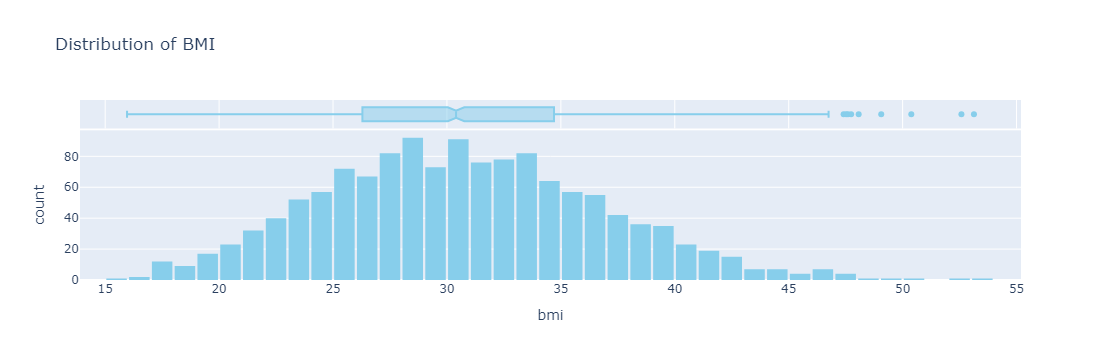

In [17]:
fig=px.histogram(medical_df,x='bmi',marginal='box',color_discrete_sequence=['skyblue'],title="Distribution of BMI")
fig.update_layout(bargap=0.1)
fig.show()

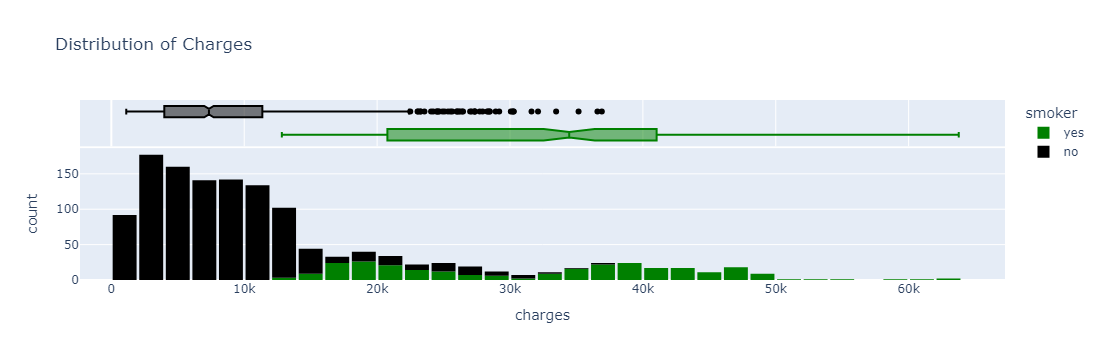

In [18]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['Green','Black'],title="Distribution of Charges")
fig.update_layout(bargap=0.1)
fig.show()

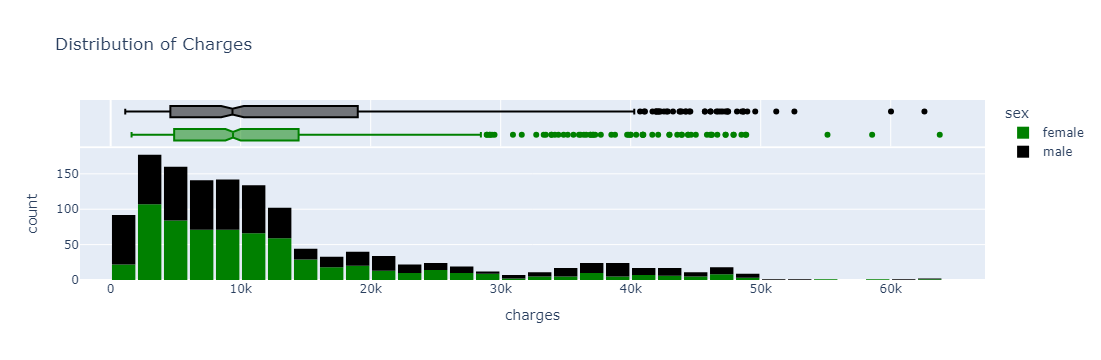

In [19]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='sex',color_discrete_sequence=['Green','Black'],title="Distribution of Charges")
fig.update_layout(bargap=0.1)
fig.show()

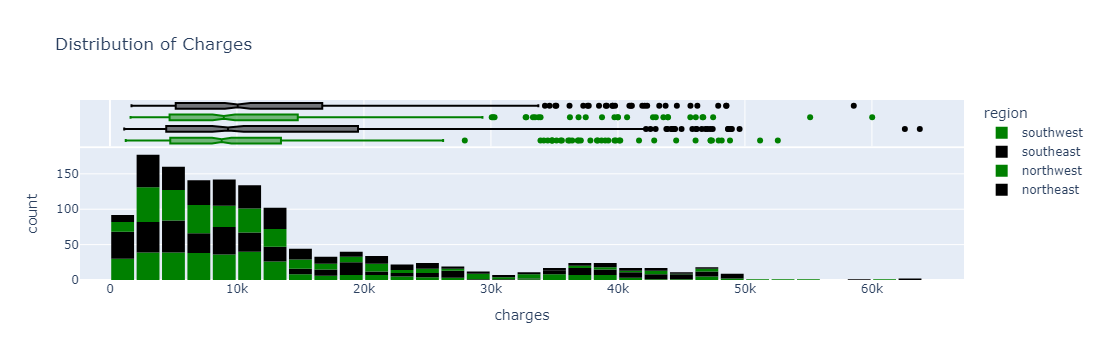

In [20]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='region',color_discrete_sequence=['Green','Black'],title="Distribution of Charges")
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

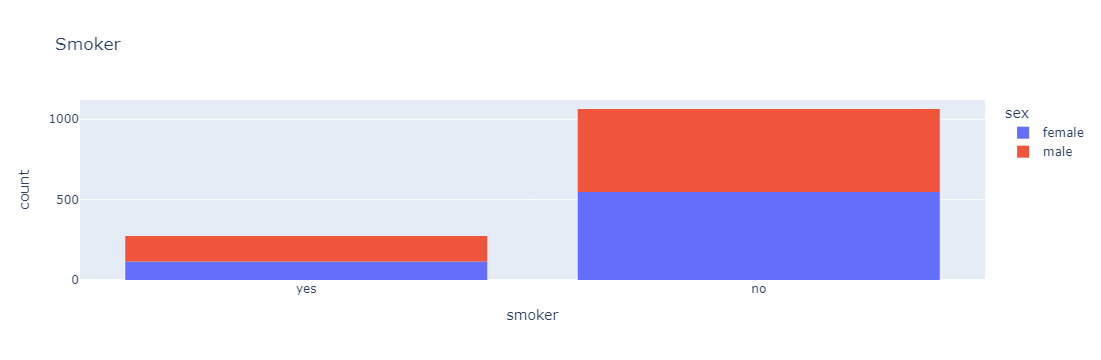

In [22]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

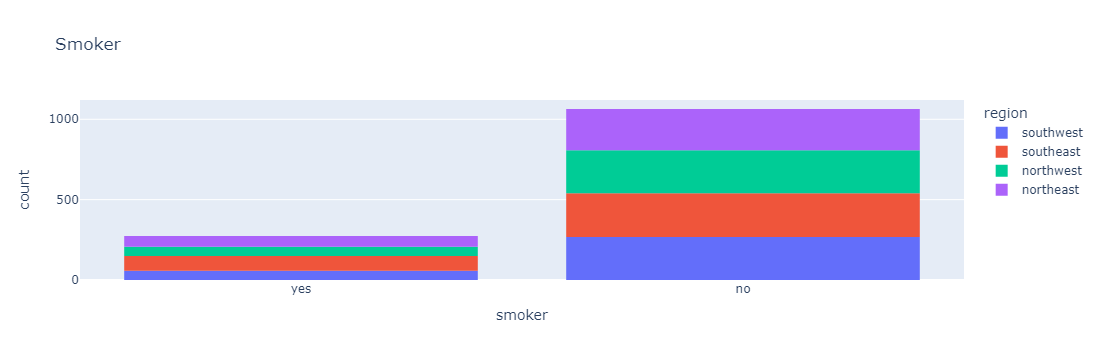

In [23]:
px.histogram(medical_df,x='smoker',color='region',title='Smoker')

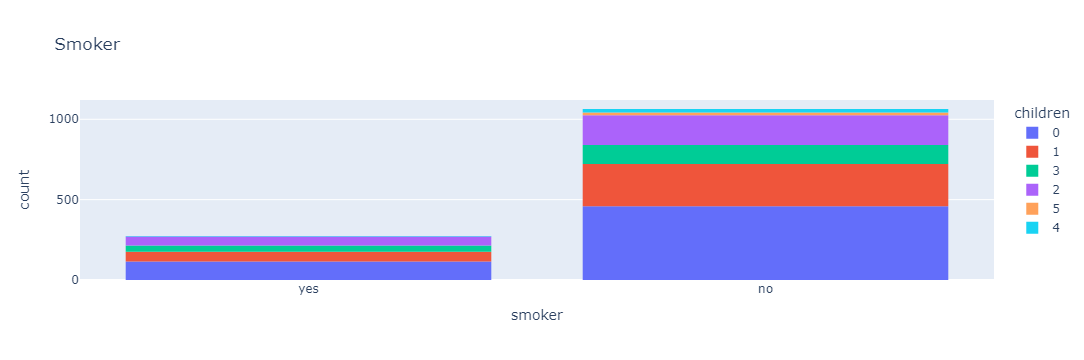

In [24]:
px.histogram(medical_df,x='smoker',color='children',title='Smoker')

Age and Charges

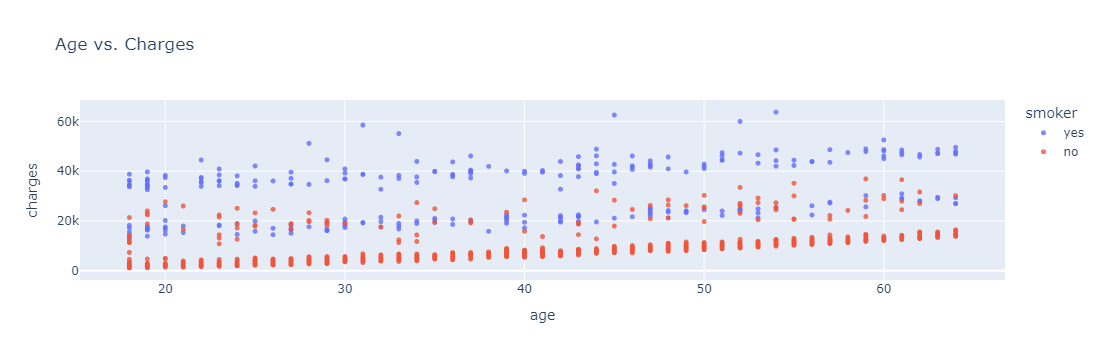

In [26]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
hover_data=['sex'],
title="Age vs. Charges")
fig.update_traces(marker_size=5)
fig.show()

               

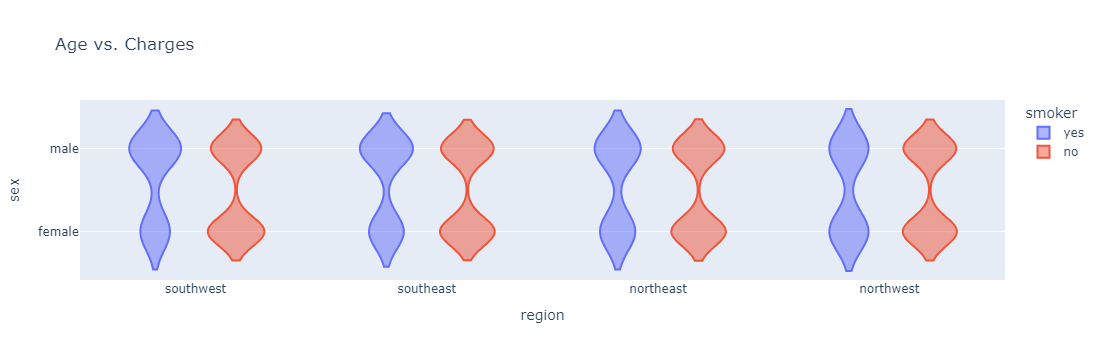

In [27]:
fig=px.violin(medical_df,
               x='region',
               y='sex',
               color='smoker',
hover_data=['sex'],
title="Age vs. Charges")
fig.update_traces(marker_size=5)
fig.show()

               

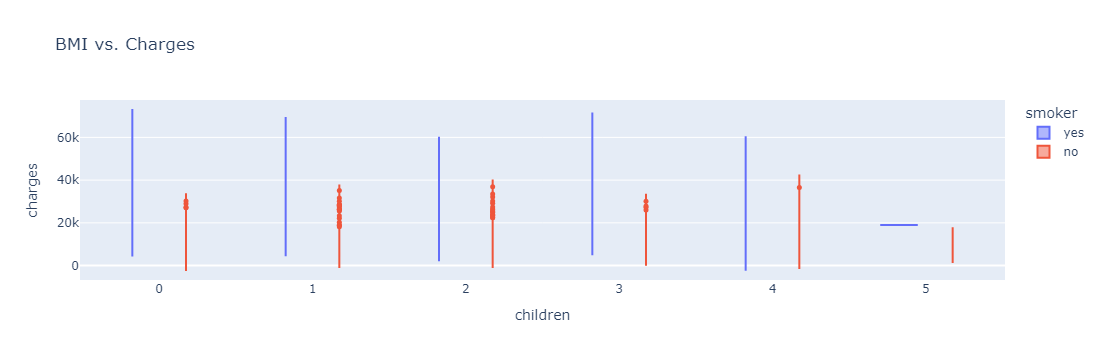

In [28]:
fig = px.violin(medical_df, 
                 x='children', 
                 y='charges', 
                 color='smoker', 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [29]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [30]:
medical_df.charges.corr(medical_df.children)

0.0679982268479047

In [31]:
medical_df.charges.corr(medical_df.bmi)


0.1983409688336288

In [32]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [33]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [34]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984785

In [35]:
medical_df_numeric = medical_df.select_dtypes(include=[float, int])
correlation_matrix = medical_df_numeric.corr()
correlation_matrix


age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

In [36]:
medical_df_numeric.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

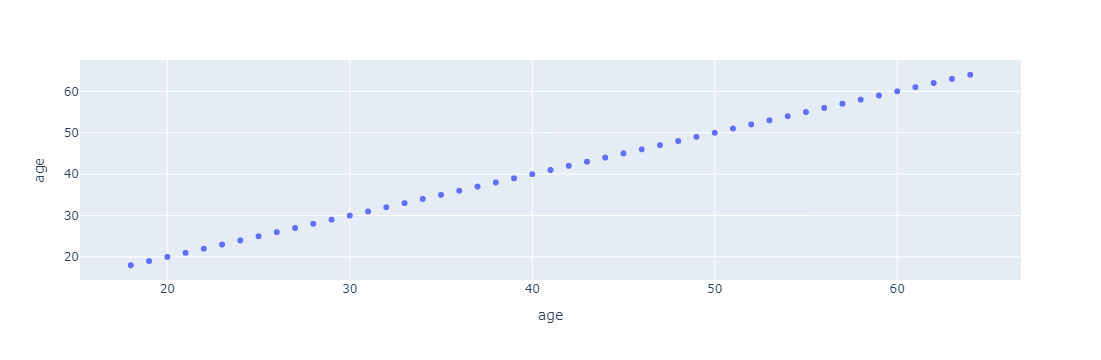

In [37]:
px.scatter(medical_df,x='age',y='age')

Text(0.5, 1.0, 'Correltion matrix')

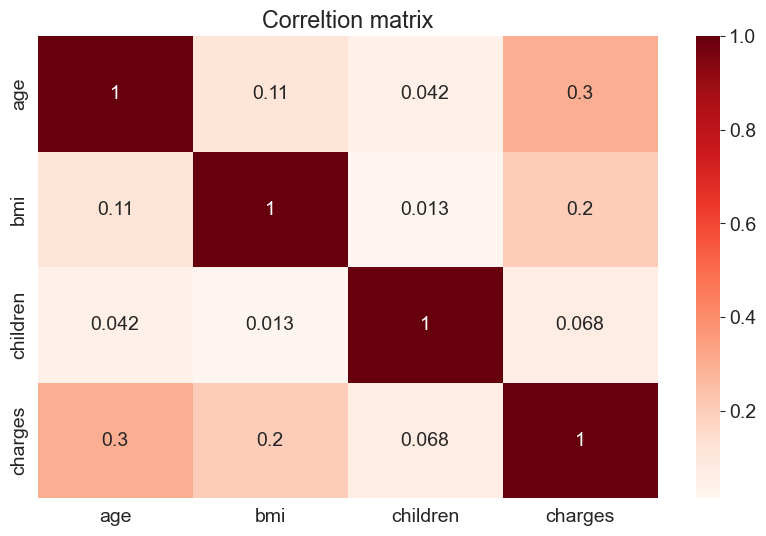

In [38]:
sns.heatmap(medical_df_numeric.corr(),cmap='Reds',annot=True)
plt.title('Correltion matrix')

## Linear Regression using a Single Feature

In [40]:
non_smoker_df=medical_df[medical_df.smoker=='no']
print(non_smoker_df)

      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]


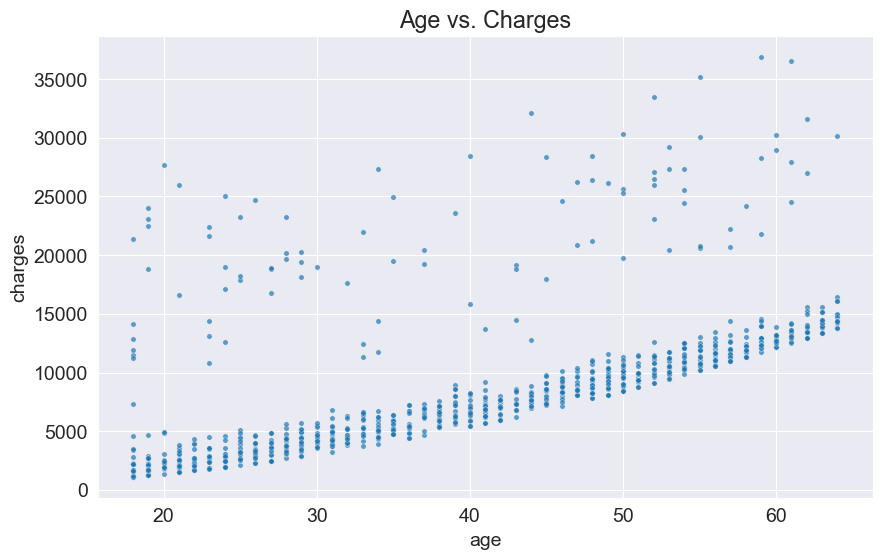

In [41]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)
plt.show()

In [42]:
def estimate_charges(age,w,b):
    return w*age+b
    


In [43]:
w=50
b=100

In [44]:
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages,w,b)

In [45]:
print(estimated_charges)

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64


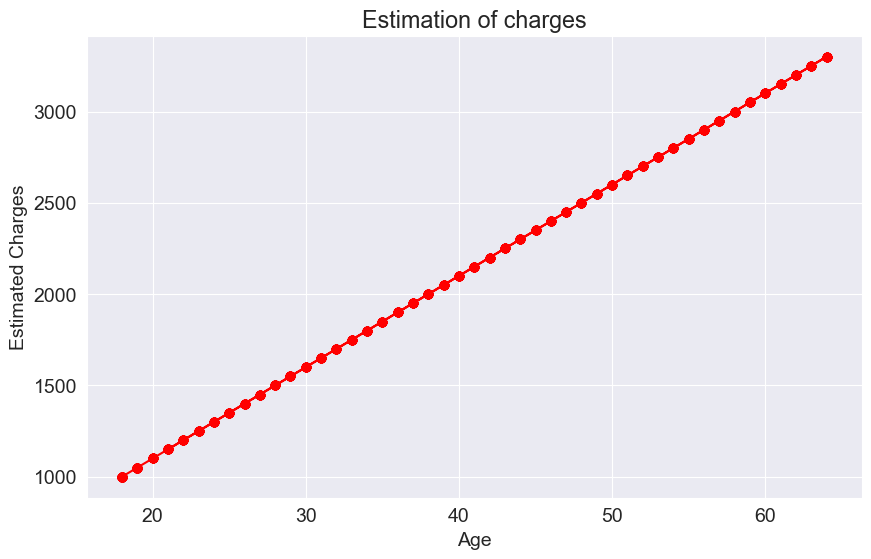

In [46]:
plt.title("Estimation of charges");
plt.plot(ages,estimated_charges,'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

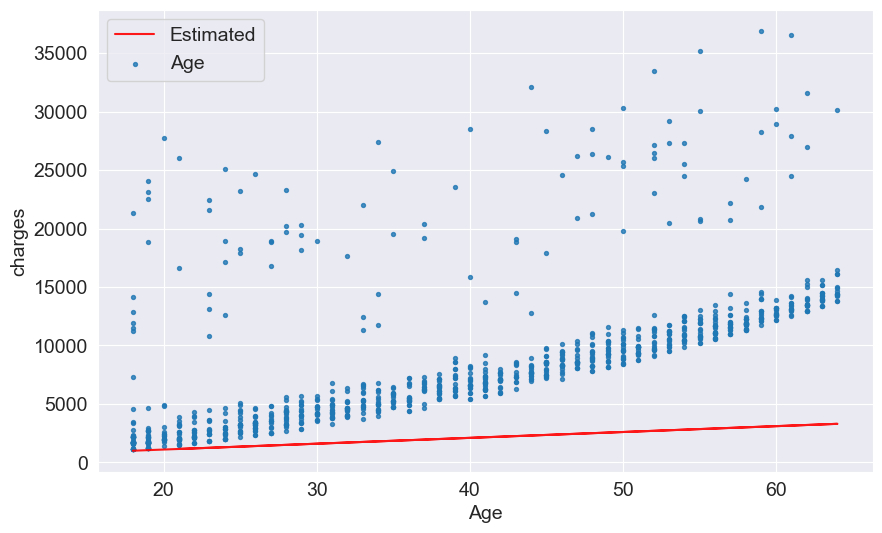

In [47]:
target=non_smoker_df.charges
plt.plot(ages,estimated_charges,'r',alpha=0.9)
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('charges')
plt.legend(['Estimated','Age'])

In [48]:
def try_parameter(w,b):
    ages=non_smoker_df.age
    target=non_smoker_df.charges

    
    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages,estimated_charges,'r',alpha=0.8)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);



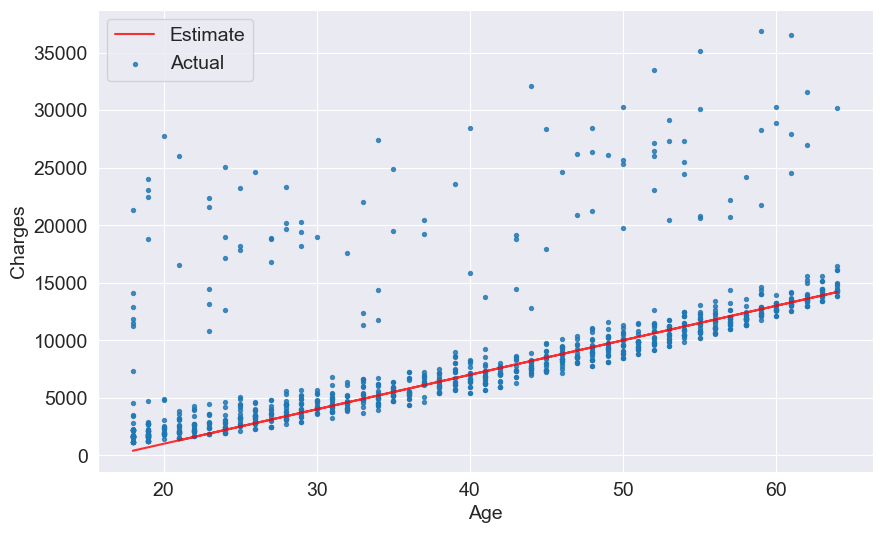

In [49]:
try_parameter(300,-5000)

In [50]:
!pip install numpy --quiet
import numpy as np

In [51]:
def rmse(targets,prediction):
    return np.sqrt(np.mean(np.square(targets-prediction)))

In [52]:
w=300
b=-5000

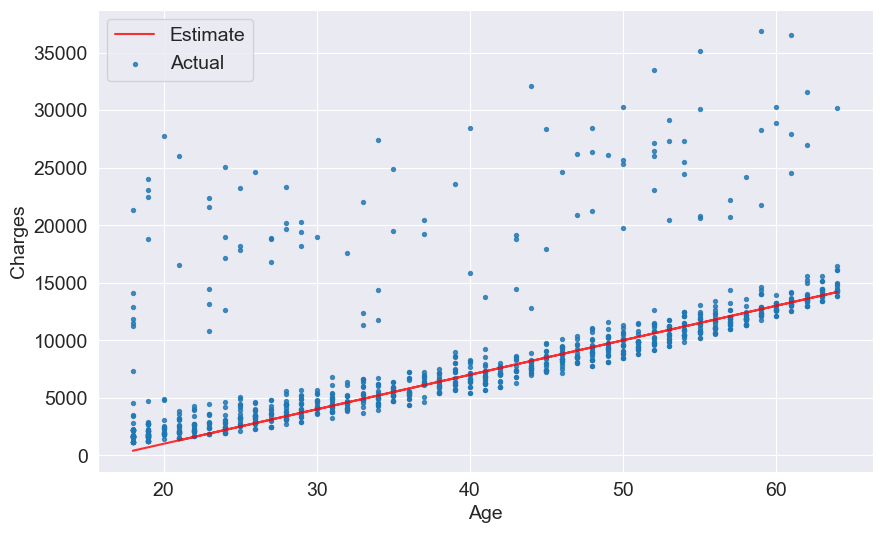

In [53]:
try_parameter(w, b)


In [54]:
target=non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df.age,w,b)


In [55]:
rmse(target,predicted)

4956.973980899423

In [56]:
def try_parameters(w,b):
    ages=non_smoker_df.age
    target=non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    loss=rmse(target,predicted)
    print("RMSE Loss: ", loss)



RMSE Loss:  4956.973980899423


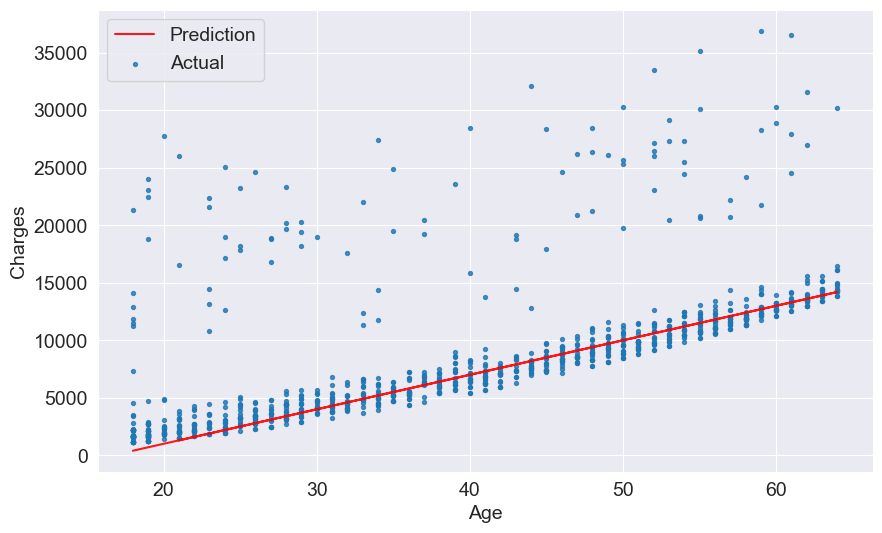

In [57]:
try_parameters(300,-5000)

In [58]:
!pip install scikit-learn --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model=LinearRegression()

In [61]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [62]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print('inputs:')

print(inputs)
print('\n')
print('targets :')
print(targets)

inputs:
      age
1      18
2      28
3      33
4      32
5      31
...   ...
1332   52
1333   50
1334   18
1335   18
1336   21

[1064 rows x 1 columns]


targets :
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


In [63]:
print("input.shapes : ",inputs.shape)
print("target.shapes : ",targets.shape)

input.shapes :  (1064, 1)
target.shapes :  (1064,)


In [64]:
model.fit(inputs,targets)

LinearRegression()

In [65]:
model.predict(np.array([[20], 
                        [40], 
                        [61]]))

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 3253.55770006,  8598.53595668, 14210.76312614])

In [66]:
predictions=model.predict(inputs)

In [67]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [68]:
rmse(targets,predictions)

4662.505766636395

In [69]:
#w is stored in coefficient
model.coef_

array([267.24891283])

In [70]:
#b is stored in intercept
model.intercept_

-2091.4205565650827

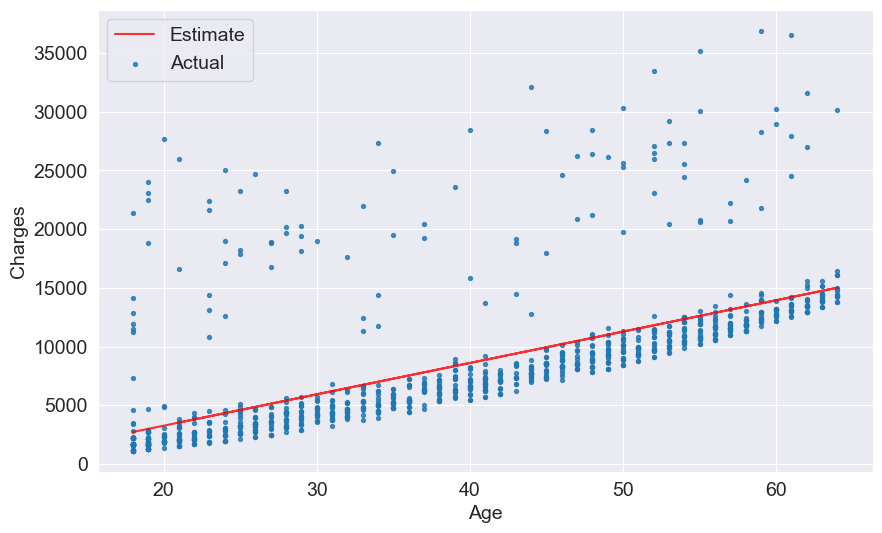

In [71]:
try_parameter(model.coef_,model.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers.

EXERCISE : Use the SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique. Make predictions and compute the loss. Do you see any difference in the resul
t?

In [73]:
from sklearn.linear_model import LinearRegression, SGDRegressor


In [74]:
sgd_model=SGDRegressor(max_iter=1300,tol=1e-3)
sgd_model.fit(inputs,targets)


SGDRegressor(max_iter=1300)

In [75]:
sgd_predictions=sgd_model.predict(inputs)

In [76]:
sgd_predictions

array([4000.73670891, 4794.23298573, 5190.98112414, ..., 4000.73670891,
       4000.73670891, 4238.78559195])

In [77]:
rmse(targets,predictions)

4662.505766636395

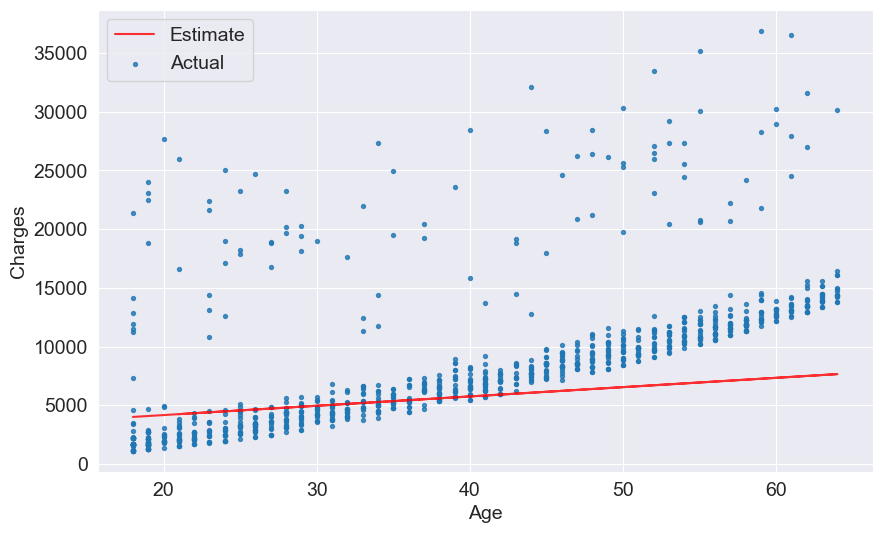

In [78]:
try_parameter(sgd_model.coef_,sgd_model.intercept_)

## SGR Regression
for smokers 


In [80]:
smoker_df=medical_df[medical_df.smoker=='yes']
predicted_smoker=estimate_charges(smoker_df.age,w,b)


In [81]:
target=smoker_df.charges

In [82]:
rmse(target,predicted_smoker)

27654.463910686572

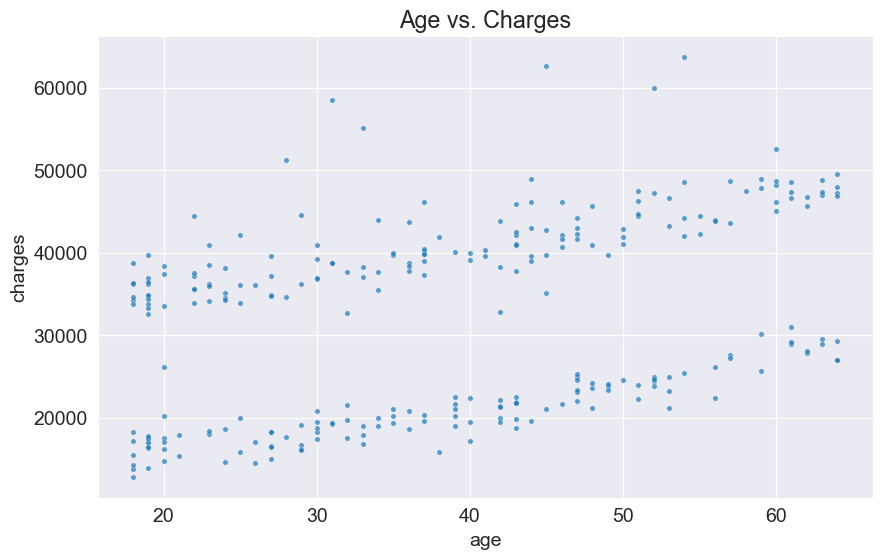

In [83]:
plt.title('Age vs. Charges')
sns.scatterplot(data=smoker_df, x='age', y='charges', alpha=0.7, s=15)
plt.show()

In [84]:
#create inputs
inputs,targets=non_smoker_df[['age']],non_smoker_df['charges']
#train model
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss :',loss )

Loss : 4662.505766636395


In [86]:
inputs,targets=non_smoker_df[['age','bmi']],non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss :',loss )

Loss : 4662.3128354612945


In [87]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

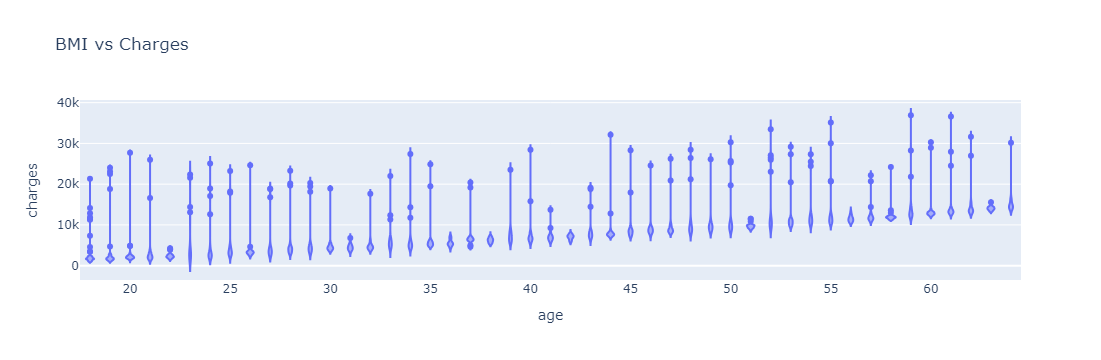

In [88]:
fig=px.violin(non_smoker_df,x='age',y='charges',title='BMI vs Charges')
fig.update_traces(marker_size=6)
fig.show()

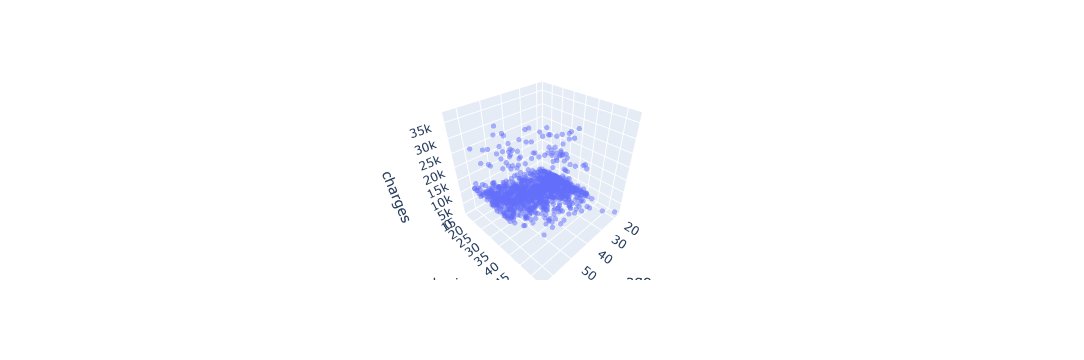

In [89]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [90]:
inputs=non_smoker_df[['bmi']]
targets==non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss : ',loss)

Loss :  5969.772531913293


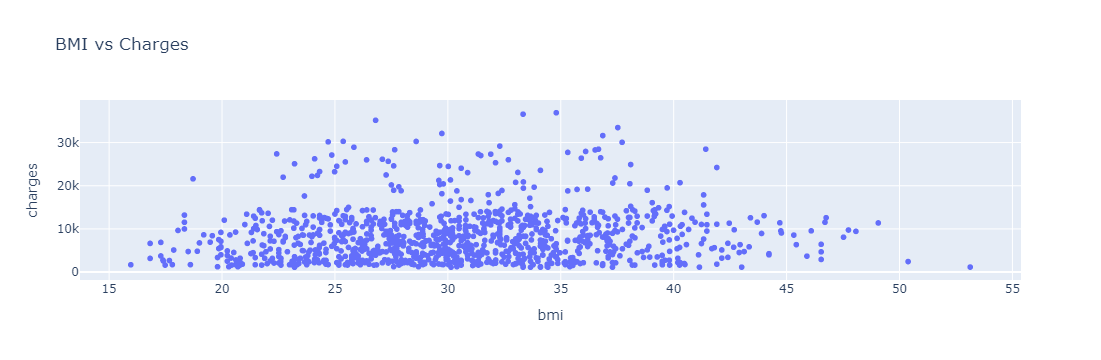

In [91]:
fig=px.scatter(non_smoker_df,x='bmi',y='charges',title='BMI vs Charges')
fig.update_traces(marker_size=6)
fig.show()

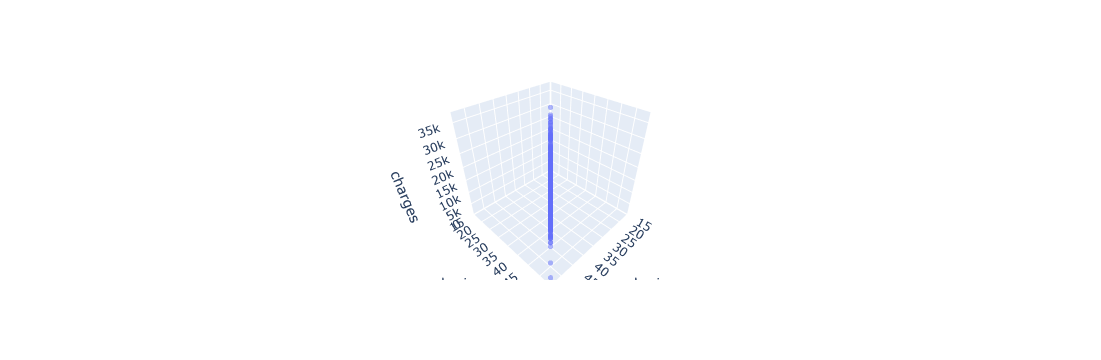

In [92]:
fig = px.scatter_3d(non_smoker_df, x='bmi', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [93]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542186

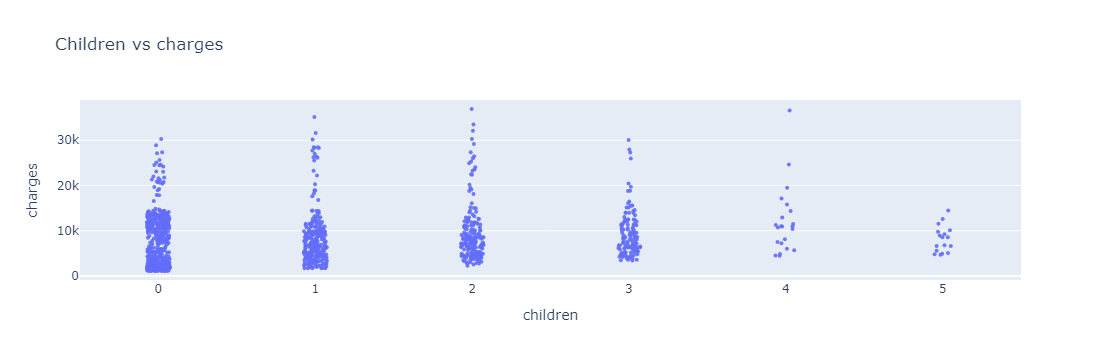

In [94]:
fig=px.strip(non_smoker_df,x='children',y='charges',title='Children vs charges')
fig.update_traces(marker_size=4,marker_opacity=0.9)
fig.show()

In [95]:
print('hlo')

hlo


In [96]:
inputs,targets =non_smoker_df[['age','bmi','children']],non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss : ',loss)

Loss :  4608.470405038246


In [97]:
inputs,targets =medical_df[['age','bmi','children']],medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss : ',loss)

Loss :  11355.317901125973


<Axes: xlabel='smoker', ylabel='charges'>

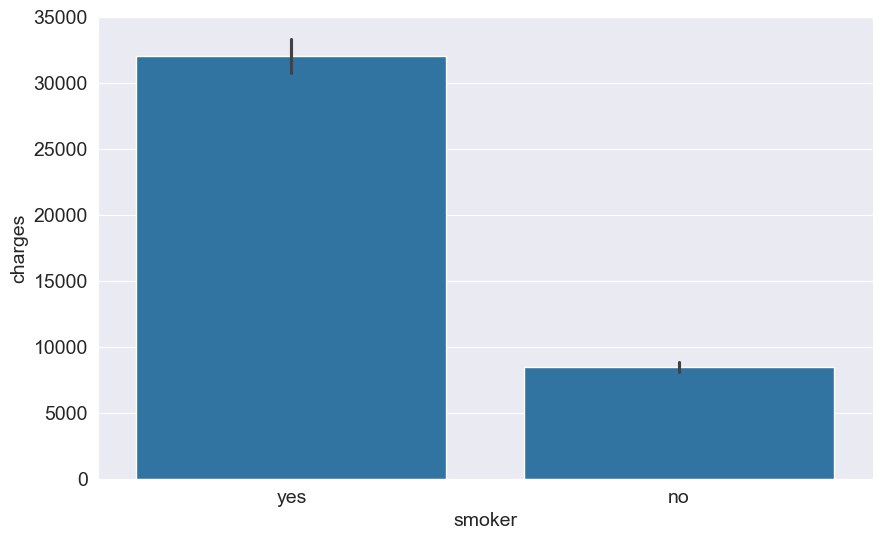

In [98]:
sns.barplot(data=medical_df,x='smoker',y='charges')

In [99]:
smoker_code={'no':0,
            'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_code)


In [100]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984785

In [101]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
1333            0  
1334            0  
1335            0  
1336            0  
1337            1  

[1338 rows x 8 columns]

In [102]:
 #Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

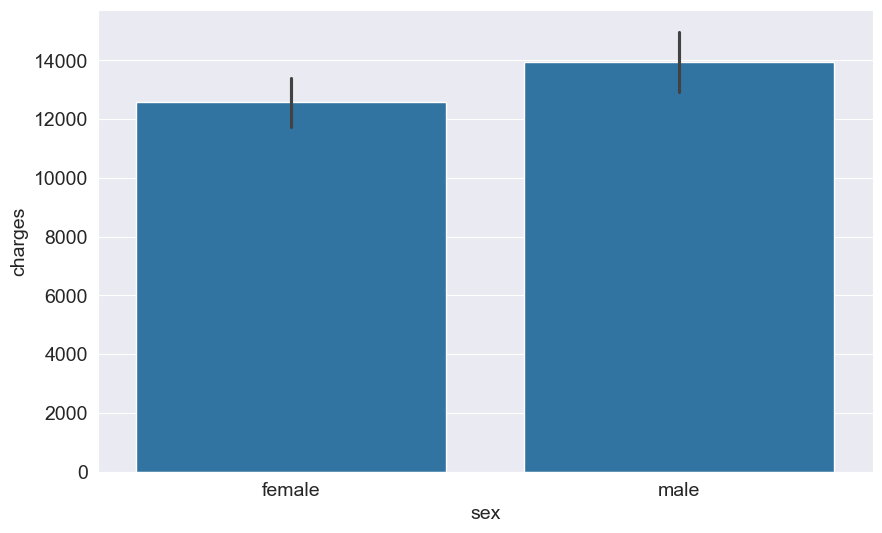

In [103]:
sns.barplot(data=medical_df, x='sex', y='charges')


In [104]:
sex_codes = {'female': 0, 'male': 1}


In [105]:
medical_df['sex_code']=medical_df.sex.map(sex_codes)


In [106]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202527

In [107]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  
0               1         0  
1               0         1  
2               0         1  
3               0         1  
4               0         1  
...           ...       ...  
1333            0         1  
1334            0         0  
1335            0         0  
1336            0         0  
1337            1         0  

[1338 rows x 9 columns]

In [108]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

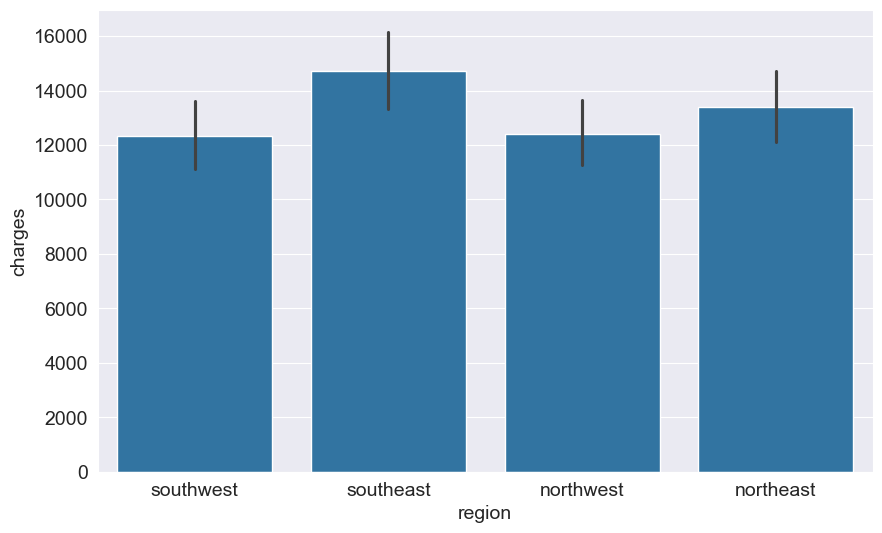

In [109]:
sns.barplot(data=medical_df,x='region',y='charges')

In [110]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [111]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [112]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [113]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [114]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs,targets=medical_df[input_cols],medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)

6041.6796511744515


In [116]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [117]:
model.intercept_

-12525.547811195444

In [118]:
weights_df=pd.DataFrame({

    'feature':np.append(input_cols,1),
    'weight':np.append(model.coef_,model.intercept_)
})

In [119]:
weights_df


feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

In [120]:
medical_df


age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [126]:
cat_cols=['smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
categorical_data=medical_df[cat_cols].values

In [127]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
targets=medical_df.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)

6041.6796511744515


In [128]:
weights_df=pd.DataFrame({
    'feature':np.append(numeric_cols+cat_cols,1),
    'weight':np.append(model.coef_,model.intercept_)
})
weights_df.sort_values('weight',ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [131]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5702.079440201983


In [132]:
predictions_train=model.predict(inputs_train)
loss=rmse(targets_train,predictions_train)
print(loss)

6080.982558351249
